# spice.py 使用示例：一个差分放大器的计算

本例中计算以下差分放大器的传输特性[(来源)](https://sites.bu.edu/engcourses/files/2016/08/mosfet-differential-amplifier.pdf)。

![](circuit.png)

In [1]:
from spice import V,R,MOSFET,solve,clear,Vertex
from numpy import linspace

NMOS = lambda G,D,S,ratio,V_DS=2: MOSFET(G=G,D=D,S=S,mode="depletion",
        V_TN=1,channel="N",K=ratio*1e-5,l=1e-2,V_DS=V_DS)
PMOS = lambda G,D,S,ratio,V_DS=2: MOSFET(G=G,D=D,S=S,mode="depletion",
        V_TN=1,channel="P",K=ratio*5e-6,l=1e-2,V_DS=V_DS)

V("VCC","GND",10)
V1=V("V1","GND",5) #共模输入
V2=V("V2","V1",4e-3) #差分输入

# 上面的电流镜
PMOS(D=2,G=2,S="VCC",ratio=5/11)
PMOS(D=3,G=2,S="VCC",ratio=5/11)

# 下面的电流镜
R("VCC",1,1e4)
NMOS(D=1,     G=1,S="GND",ratio= 1)
NMOS(D=4,     G=1,S="GND",ratio=.2)
NMOS(D="Vout",G=1,S="GND",ratio= 1)

# 输入MOS管
NMOS(D=2,G="V1",S=4,ratio=4)
NMOS(D=3,G="V2",S=4,ratio=4)

# 输出MOS管
PMOS(S="VCC",G=3,D="Vout",ratio=9/2)

res = solve(full_output=True,eps=1e-8)
print(res)

以上结果显示了求解过程中Newton-Raphson迭代中误差的变化。

接下来计算差分输入从-0.1V到0.1V变化时输出的变化。

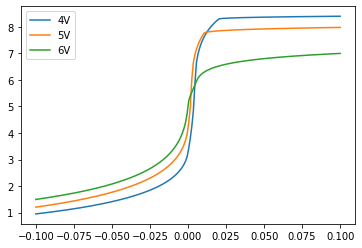

In [7]:
import matplotlib.pyplot as plt

vdc = linspace(-.1,.1,200)
for v1 in [4,5,6]:
    V1.U = v1
    vout = []
    for v in vdc:
        V2.U = v
        res = solve(eps=1e-8,N=1000,disp=0,full_output=True)
        if not res.done:
            print(res.msg)
            break
        vout.append(Vertex("Vout").V @ res.sol)
    plt.plot(vdc,vout, label=f"{v1}V")
plt.legend()
plt.show()